## Import necessary Libraries

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import dataset and Separate data into feature and labels

In [131]:
data = pd.read_csv('Salary_Data.csv')
feature = data.iloc[:,:-1].to_numpy()
label = data.iloc[:,-1].to_numpy()
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Treating Missing Data in Dataset

In [132]:
from sklearn.impute import SimpleImputer

miss_treat = SimpleImputer(
    missing_values=np.nan,
    strategy="mean",
)
miss_treat.fit(feature[:, :]) # fit data values to fit the model
feature[:,:] = miss_treat.transform(feature[:, :]) # replace the values of missing values to obtained value

feature

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

## Split data into train and test

In [133]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, label_train, label_test = train_test_split(
    feature,
    label,
    test_size=0.2,
    random_state=np.random.randint(low=0, high=100, size=1)[0],
    shuffle=True
)

## Creating Regression model

In [134]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(feature_train,label_train)

LinearRegression()

## Predict on test data

In [135]:
predict_test = model.predict(feature_test)

observe = np.stack([predict_test,label_test])
observe

array([[ 82600.92714535,  63921.12035104,  40571.36185816,
         61119.1493319 , 107818.66631767, 116224.57937511],
       [ 93940.        ,  55794.        ,  37731.        ,
         57189.        , 109431.        , 112635.        ]])

## Plot the Training set result

Text(0, 0.5, 'Salary')

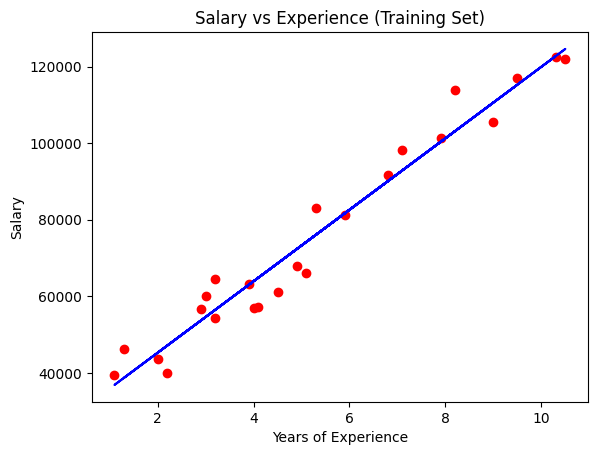

In [136]:
plt.scatter(
    feature_train,
    label_train,
    color='red'
)
plt.plot(
    feature_train,
    model.predict(feature_train),
    color='blue'
)
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

## Plot the test result

Text(0, 0.5, 'Salary')

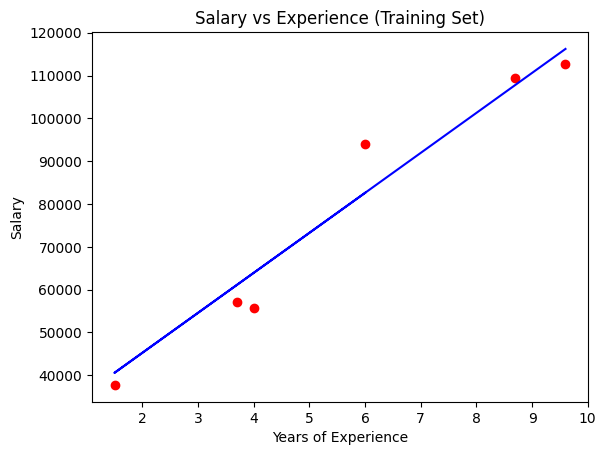

In [137]:
plt.scatter(
    feature_test,
    label_test,
    color='red'
)
plt.plot(
    feature_test,
    predict_test,
    color='blue'
)
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

## Final Accuracy of the model

In [138]:
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix,r2_score

r2_score(y_true=label_test,y_pred=predict_test)

0.9531732818427658